In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [10]:
audio_df = pd.read_csv(r"aggregated_data\aggregated_audio\aggregated_audio_features.csv")
mean_main_df = pd.read_csv(r"aggregated_data\aggregated_main\mean_main_features.csv")

In [11]:
audio_df.columns

Index(['avg(num_followers)', 'avg(pid)', 'avg(avg(pid))',
       'avg(avg(num_followers))', 'avg(avg(acousticness))',
       'avg(avg(danceability))', 'avg(avg(duration_ms))', 'avg(avg(energy))',
       'avg(avg(instrumentalness))', 'avg(avg(key))', 'avg(avg(liveness))',
       'avg(avg(loudness))', 'avg(avg(mode))', 'avg(avg(speechiness))',
       'avg(avg(tempo))', 'avg(avg(valence))'],
      dtype='object')

In [12]:
audio_df.shape

(620, 16)

In [13]:
audio_df['avg(num_followers)'] = audio_df['avg(num_followers)'].apply(lambda x: np.int64(x))
audio_df['avg(num_followers)'] = np.log(audio_df['avg(num_followers)'])
audio_df['quartile_group'] = pd.qcut(audio_df['avg(num_followers)'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg(avg(tempo))', ylabel='avg(num_followers)'>

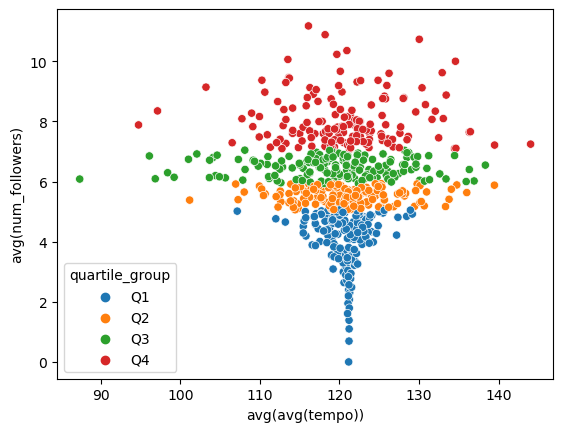

In [14]:
sns.scatterplot(data=audio_df,x="avg(avg(tempo))",y="avg(num_followers)",hue="quartile_group")

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg(avg(duration_ms))', ylabel='avg(num_followers)'>

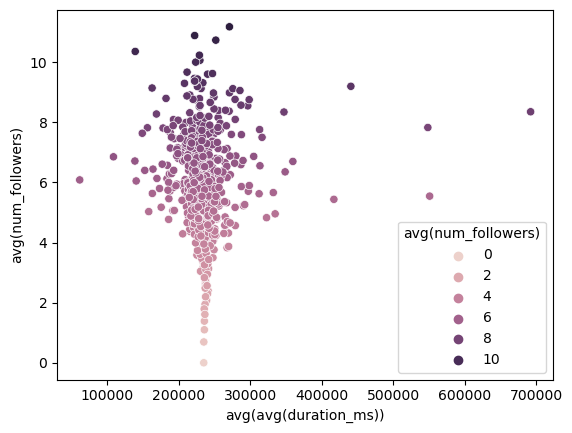

In [15]:
sns.scatterplot(data=audio_df,y="avg(num_followers)",hue="avg(num_followers)",x="avg(avg(duration_ms))")

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg(avg(acousticness))', ylabel='avg(num_followers)'>

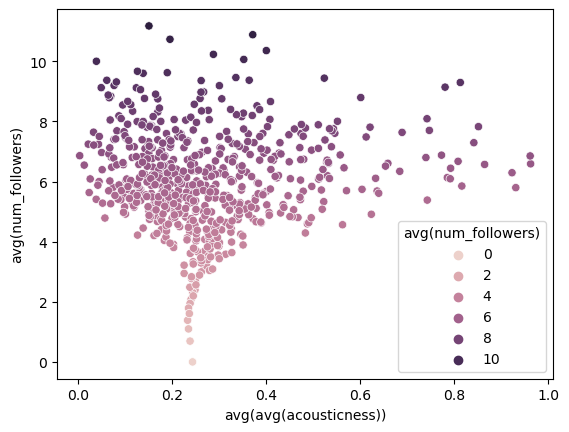

In [16]:
sns.scatterplot(data=audio_df,y="avg(num_followers)",hue="avg(num_followers)",x="avg(avg(acousticness))")

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg(avg(danceability))', ylabel='avg(num_followers)'>

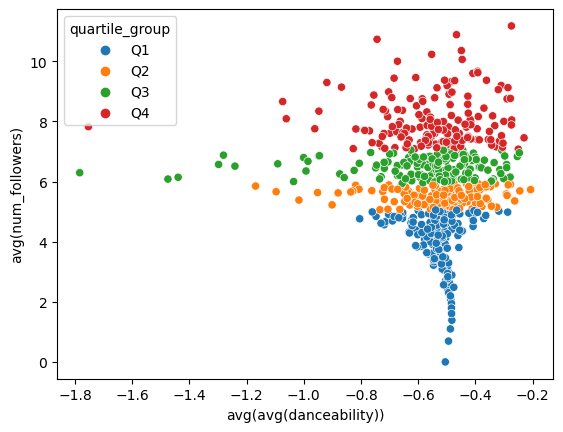

In [17]:
audio_df["avg(avg(danceability))"] = np.log(audio_df["avg(avg(danceability))"])
sns.scatterplot(data=audio_df,y="avg(num_followers)",hue="quartile_group",x="avg(avg(danceability))")

In [38]:
mean_main_df.columns

Index(['num_followers', 'mean_track_length', 'mean_num_artists',
       'mean_num_albums'],
      dtype='object')

In [18]:
mean_main_df['quartile_group'] = pd.qcut(mean_main_df['num_followers'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [19]:
mean_main_df['mean_track_length'] = np.log(mean_main_df['mean_track_length'])

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='mean_track_length', ylabel='num_followers'>

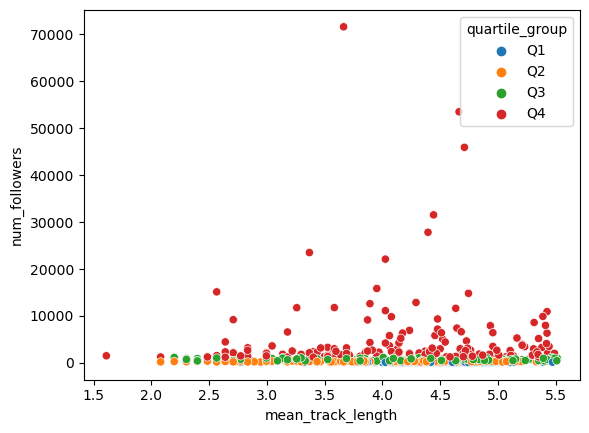

In [20]:
sns.scatterplot(data=mean_main_df,x="mean_track_length",y="num_followers",hue="quartile_group")

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='mean_num_artists', ylabel='num_followers'>

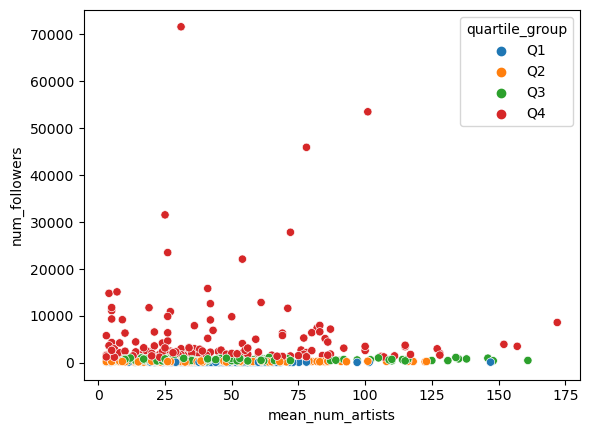

In [21]:
sns.scatterplot(data=mean_main_df,x="mean_num_artists",y="num_followers",hue="quartile_group")